In [1]:
# Proyecto de trayectorias aéreas

"""
El objetivo es minimizar el número de interacciones entre aviones, para ello hay que
modificar las rutas de cada avión de acuerdo a las restricciones.

La idea es considerar el espacio 3D , con 2D espaciales y una temporal (o en volá 4D)
x en [x_ini, x_fin], para fines de simplificar x en [0, X] (i.e x_ini = 0, x_fin = X)
same shit with the others

Este espacio se discretiza formando una grilla terrible cuatica, luego cada punto
de cada Trayectoria (vuelo), se ubica en una casilla, si dos puntos estan cerca (i.e. estan 
en casillas adjuntas) se calcula su distancia y se ve si hay interacción. 
El grafo a usar en cuestión es tal que cada vertice es una distribución de las N trayectorias,
dos vertices son vecinos si difieren en exactamente 1 elemento de (x,y) (t) (o tambien (z))

"""

'\nEl objetivo es minimizar el número de interacciones entre aviones, para ello hay que\nmodificar las rutas de cada avión de acuerdo a las restricciones.\n\nLa idea es considerar el espacio 3D , con 2D espaciales y una temporal (o en volá 4D)\nx en [x_ini, x_fin], para fines de simplificar x en [0, X] (i.e x_ini = 0, x_fin = X)\nsame shit with the others\n\nEste espacio se discretiza formando una grilla terrible cuatica, luego cada punto\nde cada Trayectoria (vuelo), se ubica en una casilla, si dos puntos estan cerca (i.e. estan \nen casillas adjuntas) se calcula su distancia y se ve si hay interacción. \nEl grafo a usar en cuestión es tal que cada vertice es una distribución de las N trayectorias,\ndos vertices son vecinos si difieren en exactamente 1 elemento de (x,y) (t) (o tambien (z))\n\n'

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

np.random.seed(42)

X = Y = 100
T = 60
vel = 1.4
def crear_trayectoria(n_tray,n_puntos):
    trayectories = []

    delta = X / n_puntos
    delta_t = int(T / n_puntos)

    for i in range(n_tray):
        P = []
        x = 0
        y = 0
        t = np.random.randint(0, T)
        P.append([x, y, t]) 

        for k in range(n_puntos):
            x = np.random.uniform(delta*k, delta*(k+1))
            y = np.random.uniform(delta*k, delta*(k+1))
            # calcular t =dist/ vel
            a = np.array((x, y))
            b = np.array((P[k][0], P[k][1]))
            dist = np.linalg.norm(a-b)
            t = dist / vel + P[k][2]
            P.append([x, y, t])
        x = 100
        y = 100
        a = np.array((x, y))
        b = np.array((P[n_puntos][0], P[n_puntos][1]))
        dist = np.linalg.norm(a-b)
        t = dist / vel + P[n_puntos][2]
        P.append([x, y, t])
        P = np.array(P)
        trayectories.append(P)
    return trayectories

In [2]:
trayectories=crear_trayectoria(10,8)
trayectories

[array([[  0.        ,   0.        ,  38.        ],
        [  9.95678734,   2.29293487,  45.29813942],
        [ 22.2461375 ,  19.96062697,  60.67064787],
        [ 30.57290941,  26.24968645,  68.12415682],
        [ 43.24061115,  41.67135764,  82.37945676],
        [ 51.78583522,  58.13610591,  95.62957786],
        [ 63.20514474,  71.52498465, 108.19903192],
        [ 86.73190886,  75.00973457, 125.18720476],
        [ 99.90264449,  95.21851887, 142.41709159],
        [100.        , 100.        , 145.83314312]]),
 array([[  0.        ,   0.        ,  57.        ],
        [  6.5594554 ,   5.39931273,  63.06844604],
        [ 16.14036425,  20.14816118,  75.63099048],
        [ 26.74367326,  28.65180811,  85.33955426],
        [ 42.07952304,  43.2008748 , 100.43894657],
        [ 59.81469952,  52.49592228, 114.7413367 ],
        [ 68.92793048,  69.90518211, 128.7772474 ],
        [ 75.58063016,  82.59431065, 139.01105482],
        [ 89.63155155,  88.31314491, 149.84687639],
        [1

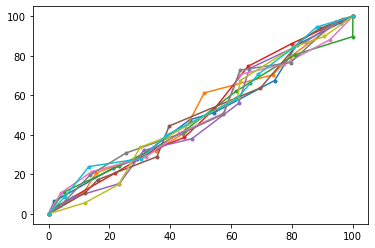

In [3]:
trayectories=crear_trayectoria(10,8)
for P in trayectories:
    plt.plot(P[:,0], P[:,1], ".-")

In [4]:
for P in trayectories:
    print(P[:,2])

[ 32.          36.73283161  55.05327565  61.54136117  80.36456101
  86.6056904  104.96392706 118.81671415 131.89741939 135.63557462]
[ 49.          60.38097871  67.97597105  84.02945548  92.86398003
 108.47674712 125.89985699 133.39768347 151.95442549 154.56802117]
[ 23.          31.71056425  47.65788412  58.26348304  67.74291155
  86.49826154  90.76360349 105.57172021 120.52772287 127.88569953]
[  3.           6.59558896  24.52269731  37.86199958  45.37067587
  58.03392361  75.17228018  88.30995795 101.99058496 105.7592578 ]
[ 29.          37.29741393  49.28011456  62.53456555  74.62505985
  91.41817021 104.29313559 120.51142761 127.97924549 135.16613172]
[ 30.          41.49044562  47.08464774  63.28348135  74.71292873
  93.48191651 100.17986866 119.48478831 126.13511147 134.93535817]
[  1.           9.10623528  19.68094299  33.37077936  44.91814989
  57.86147244  72.10813053  83.43800242  97.28763033 107.32943601]
[ 50.          54.51138795  67.19497769  78.74919179  94.0691733
 105

In [91]:
import numpy as np
import random

# Sea N el número de trayectorias

trayectorias_originales = np.array(trayectories) 
N = len(trayectorias_originales)

""" Si es que entendí el coso, Se supone que hay que tambien hay que conocer los w_i (los (x,y) permitidos para modificar), 
los delta_i (tiempo inicial permitidos creo) y l_i (same shit with z), este ultimo no  se considera si se deja fuera el eje Z,
por otro lado, hay que cachar como definir las otras volas"""

P_w = P_l = P_d = 1 / 3

d_x = 1
d_y = 1
d_t = 1

N_x = int(X / d_x)  #  tkm por favor que sea un entero
N_y = int(Y / d_y) 
N_t = int(T / d_t) 

N_h = 1
t_eps = d_t / 2


In [92]:
# Interacciones a la mala

#1 si dos puntos coinciden (en tiempo y espacio), 0 si no 
def C(P, Q):
    x = P[0] - Q[0]
    y = P[1] - Q[1]
    d_h = np.linalg.norm((x, y))       #Distancia 
    if np.abs(P[2] - Q[2]) < 2*t_eps and d_h <= N_h:
        return 1
    else:
        return 0
    
# Ve cuando puntos chocan con la trayectoria i en en punto k
def interaccion(tray, i, k):
    suma = 0
    N=len(tray)
    for j in range(N):
        #if j!=i:
        if j>i:                ###################
            for l in range(1,len(tray[j])-1):
                suma += C(tray[i][k], tray[j][l])
                
    return suma

#Puntos totales que chocan en todas las trayectorias
def Interacciones(trayectorias):
    phi = 0
    N=len(trayectorias)
    for i in range(N):
        for k in range(i,len(trayectorias[i])-1):
            phi += interaccion(trayectorias, i, k)    
    return phi
  
  #Creo que arreglé la función para que no cuente 2 veces los puntos :)

In [94]:
# Lo anterior es un poquito ineficiente. Se da la idea de hacerlo por grillas
# No se si será la manera mas eficiente de implementarlo tho


def interaccion_por_grilla(tray):
    cas_x = []
    cas_y = []
    cas_t = []

    for x in range(N_x):
        cas_x.append([])
    for y in range(N_y):
        cas_y.append([])
    for t in range(N_t):
        cas_t.append([])
         
    phi = 0
    
    for t in tray:
        for P in t:
            n_x = int(P[0] / d_x)
            n_y = int(P[1] / d_y)
            n_t = int(P[2] / d_t)
            
            # veo si en las casillas adjuntas hay algun punto cerca
            for i in range(-1, 2):
                for j in range(-1, 2):
                    for k in range(-1, 2):
                        if len(cas_x[n_x + i])>0 and len(cas_y[n_y + j])>0 and len(cas_t[n_t + k])>0:
                            for Q in cas_x[n_x + i]:
                                if Q in cas_y[n_y + j] and Q in cas_t[n_t + k]:
                                    phi += C(P,Q)


            cas_x[n_x].append(P)
            cas_y[n_y].append(P)
            cas_t[n_t].append(P)
    
    return phi


In [95]:
import math

#cambie algunas cositas
def interaccion_por_grilla(tray):
    cas_x = []
    cas_y = []
    cas_t = []

    for x in range(N_x+1):   ###
        cas_x.append([])
    for y in range(N_y+1):   ###
        cas_y.append([])
    for t in range(3*N_t):   ###
        cas_t.append([])
         
    phi = 0
    
    for t in tray:
        for P in t[1:-1]:    ###
            n_x = math.trunc(P[0] / d_x)
            n_y = math.trunc(P[1] / d_y)
            n_t = math.trunc(P[2] / d_t)
            
            #veo si en las casillas adjuntas hay algun punto cerca
            for i in range(-1, 2):
                for j in range(-1, 2):
                    for k in range(-1, 2):
                        if len(cas_x[(n_x + i)%(N_x+1)])>0 and len(cas_y[(n_y + j)%(N_y+1)])>0 and len(cas_t[(n_t + k)%(3*N_t)])>0:
                            for Q in cas_x[(n_x + i)%(N_x+1)]:
                                if (Q in cas_y[(n_y + j)%(N_y+1)]) and (Q in cas_t[(n_t + k)%(3*N_t)]):
                                    phi += C(P,Q)
                                    #print(P,Q)

            cas_x[n_x].append(list(P))    ###
            cas_y[n_y].append(list(P))    ###
            cas_t[n_t].append(list(P))    ###
    
    return phi


In [96]:
#Probando...
#interaccion_por_grilla(Tr)
interaccion_por_grilla(trayectorias_originales)


15

In [97]:
vel = 1.4
def cambio_tiempos(T,i):
    T1 = T.copy()
    tiempo = T1[i-1][2]

    for k in range(i,len(T)):
        a = T1[k-1][0:2]
        b = T1[k][0:2]
        dist = np.linalg.norm(a-b)
        T1[k][2] = dist / vel + tiempo
        tiempo = T1[k][2]

    return T1

In [98]:
def neighborhood(trayectorias):
    t = trayectorias.copy()
    new_1 = new_2 = -1
    while new_1 > 100 or 0 > new_1 or new_2 > 100 or 0 > new_2 :
        i = np.random.randint(0, len(trayectorias))
        new_t = t[i]
        j = np.random.randint(1, len(new_t)-1)
        new_1 = new_t[j][0] + np.random.uniform(-1, 1)
        new_2 = new_t[j][1] + np.random.uniform(-1, 1)
    
    
    new_t[j][0] = new_1
    new_t[j][1] = new_2

    cambio_tiempos(new_t,j)

    t[i] = cambio_tiempos(new_t,j)
    return t

Tr=crear_trayectoria(2,1)
print(Tr)

Tr1=neighborhood(Tr)
print(Tr1)

[array([[  0.        ,   0.        ,  23.        ],
       [ 10.8150756 ,  25.15989698,  42.56134094],
       [100.        , 100.        , 125.72270289]]), array([[  0.        ,   0.        ,  27.        ],
       [ 86.12493852,  81.31050471, 111.60262218],
       [100.        , 100.        , 128.22898686]])]
[array([[  0.        ,   0.        ,  23.        ],
       [ 12.32699868,  22.37399607,  41.24647851],
       [100.        , 100.        , 124.88915768]]), array([[  0.        ,   0.        ,  27.        ],
       [ 86.12493852,  81.31050471, 111.60262218],
       [100.        , 100.        , 128.22898686]])]


In [99]:
def beta(n):
    # sucesión beta exponencial
    return 3 ** n

In [100]:
# en nuestro caso w sería el phi (interacciones), y la funcion recibiría las trayectorias iniciales

def CM(t, func_beta, trayectorias):
    """
    Simula la cadena hasta tiempo t
    func_beta es la función que da el valor de beta
    según cada iteración
    """
    X = []
    X.append(trayectorias) 
    u = np.random.uniform(0,1,t)
    i = 0
    for n in range(t):
        beta = func_beta(n)
        Y = neighborhood(X[n])
        cte_n = np.min((1, np.exp(float(-beta * (interaccion_por_grilla(Y) - interaccion_por_grilla(X[n]))))))
        
        if u[n] < cte_n:
            X.append(Y)
        else:
            X.append(X[n])
            
    return X

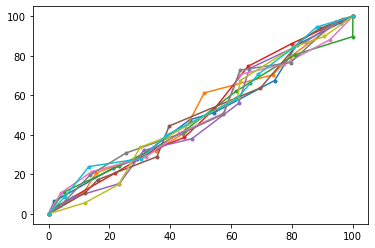

In [86]:

for P in trayectorias_originales:
    plt.plot(P[:,0], P[:,1], ".-")

0
1
2
3
4
5
6
7
8
9
9


C:\Users\Fabian\AppData\Local\Temp\ipykernel_16800\4101110792.py:17: RuntimeWarning: overflow encountered in exp
  cte_n = np.min((1, np.exp(float(-beta * (interaccion_por_grilla(Y) - interaccion_por_grilla(X[n]))))))


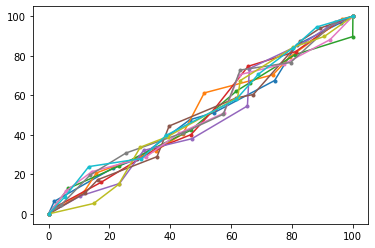

In [87]:
#Probando...

Fin=CM(10,beta,trayectorias_originales)[-1]

for k in Fin:
    plt.plot(k[:,0], k[:,1], ".-")
    
print(interaccion_por_grilla(Fin))

1338


<function matplotlib.pyplot.show(close=None, block=None)>

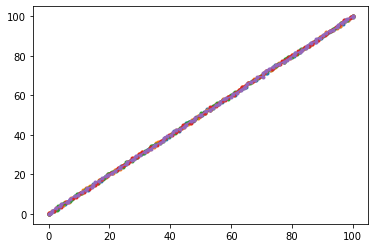

In [101]:
tray=crear_trayectoria(5,98)
tray=np.array(tray)

print(interaccion_por_grilla(tray))

for k in tray:
    plt.plot(k[:,0], k[:,1], ".-")

#plt.xlim(0,2)
#plt.ylim(0,2)
plt.show

0
1
2
3
4
5


C:\Users\Fabian\AppData\Local\Temp\ipykernel_16800\4101110792.py:17: RuntimeWarning: overflow encountered in exp
  cte_n = np.min((1, np.exp(float(-beta * (interaccion_por_grilla(Y) - interaccion_por_grilla(X[n]))))))


6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
497


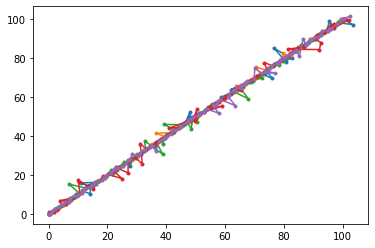

In [89]:
Fin=CM(100,beta,tray)[-1]

print(interaccion_por_grilla(Fin))

for k in Fin:
    plt.plot(k[:,0], k[:,1], ".-")
#plt.xlim(0,2)
#plt.ylim(0,2)
plt.show()

0
1
2
3
4
5
6
7
8
9


C:\Users\Fabian\AppData\Local\Temp\ipykernel_16800\4101110792.py:17: RuntimeWarning: overflow encountered in exp
  cte_n = np.min((1, np.exp(float(-beta * (interaccion_por_grilla(Y) - interaccion_por_grilla(X[n]))))))


10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
635


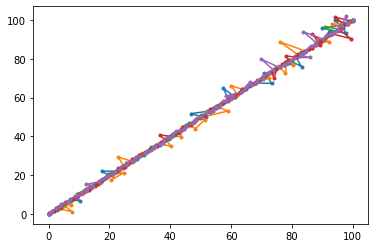

In [102]:
Fin=CM(150,beta,tray)[-1]

print(interaccion_por_grilla(Fin))

for k in Fin:
    plt.plot(k[:,0], k[:,1], ".-")
#plt.xlim(0,2)
#plt.ylim(0,2)
plt.show()

0
1
2
3


C:\Users\Fabian\AppData\Local\Temp\ipykernel_16800\4101110792.py:17: RuntimeWarning: overflow encountered in exp
  cte_n = np.min((1, np.exp(float(-beta * (interaccion_por_grilla(Y) - interaccion_por_grilla(X[n]))))))


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
27

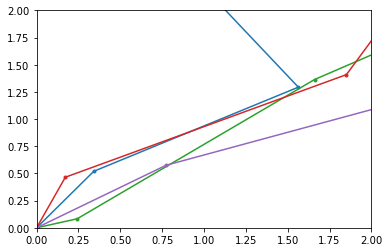

In [103]:
Fin=CM(400,beta,tray)[-1]

print(interaccion_por_grilla(Fin))

for k in Fin:
    plt.plot(k[:,0], k[:,1], ".-")
plt.xlim(0,2)
plt.ylim(0,2)
plt.show()

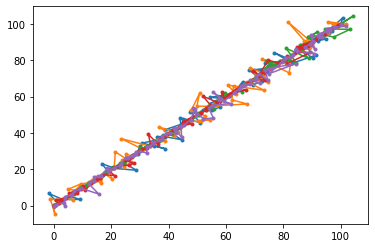

In [104]:
for k in Fin:
    plt.plot(k[:,0], k[:,1], ".-")

plt.show()

In [ ]:
d_x = 5
d_y = 5
d_t = 5

N_x = int(X / d_x) +1 #  tkm por favor que sea un entero
N_y = int(Y / d_y) +1
N_t = int(T / d_t) +1

N_h = 7
t_eps = d_t / 5

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=47c70f3e-dd89-48de-a308-e52c5c3a84e4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>